In [2]:
import pandas as pd

In [3]:
avalanche_set = pd.read_csv('newData/gesamt_set_1.csv', sep=',')

In [52]:
avalanche_set['ID'] = avalanche_set['ID'].fillna(0)
avalanche_set = avalanche_set.drop([ 'Datum','Intervall', 'ID'], axis=1)
avalanche_set = avalanche_set.dropna()

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
import statistics

feature_names = avalanche_set.columns.drop('Avalanche')
X = avalanche_set[avalanche_set.columns.drop('Avalanche')]
y = avalanche_set['Avalanche']

clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())

cvs = cross_val_score(clf, X, y, cv=10)

In [54]:
print(statistics.mean(cvs))

0.727236953552743


In [55]:
cvs = cross_val_score(clf, X, y, cv=10, scoring="precision")

In [56]:
print(statistics.mean(cvs))

0.6847103726513817


In [57]:
cvs = cross_val_score(clf, X, y, cv=5, scoring="precision")

In [58]:
print(statistics.mean(cvs))

0.6778013796845902


In [59]:
cvs = cross_val_score(clf, X, y, cv=10, scoring="recall")

In [60]:
print(statistics.mean(cvs))

0.5585804763871678


In [69]:
features_selected_set = avalanche_set[['Schneehöhe',
                                       'Niederschlag',
                                       'Lufttemperatur_7h',
                                       'Lufttemperatur_7h_Gew',
                                       'Lufttemperatur_14h_Norm',
                                       'Lufttemperatur_14h_Gew',
                                       'Lufttemperatur_19h',
                                       'Schneetemperatur',
                                       'Windrichtung_Gew',
                                       'Windstärke_Norm',
                                       'Einsinktiefe_Norm',
                                       'Wetter_akt',
                                       'Neuschnee_Norm',
                                       'Neuschnee_last4',
                                       'Neuschnee_last2',
                                       'windstaerke_last1',
                                       'windstaerke_last2',
                                       'Lufttemperatur_last4',
                                       'meanExpo',
                                       'meanSlope',
                                       'stdDevSlope',
                                       'MinSlope',
                                       'MaxSlope',
                                       'Altitude',
                                       'Avalanche']]
features_selected_set

,Schneehöhe,Niederschlag,Lufttemperatur_7h,Lufttemperatur_7h_Gew,Lufttemperatur_14h_Norm,Lufttemperatur_14h_Gew,Lufttemperatur_19h,Schneetemperatur,Windrichtung_Gew,Windstärke_Norm,...,windstaerke_last1,windstaerke_last2,Lufttemperatur_last4,meanExpo,meanSlope,stdDevSlope,MinSlope,MaxSlope,Altitude,Avalanche
0,20.0,0.0,-1.4,99999.0,20.8,99999.0,4.6,0.0,9.999900e+04,2.545584e+00,...,0.000000e+00,0.000000e+00,0.000000,240.622592,40.215386,6.827700,3.598443,60.656714,2925.378871,0
1,19.0,0.0,3.9,-5.6,28.0,10.4,3.2,0.0,-7.071068e-01,-3.674616e-11,...,2.545584e+00,0.000000e+00,0.000000,86.721312,43.193688,9.617375,0.000000,71.591813,2461.506438,0
2,19.0,9.1,7.6,15.6,37.6,14.0,2.7,0.0,-1.000000e+00,-2.880000e+01,...,-3.674616e-11,2.545584e+00,0.000000,95.782919,42.465800,8.184500,0.000000,61.137880,2423.430860,0
3,4.0,5.3,-6.0,30.4,-60.8,18.8,-4.4,0.0,1.224819e-10,2.204770e-10,...,-2.880000e+01,-3.674616e-11,0.000000,236.817015,36.165750,5.320700,23.699150,52.545750,2344.716550,0
4,10.0,7.3,-5.1,-24.0,-33.6,-30.4,-2.7,0.0,3.000000e+00,2.204770e-10,...,2.204770e-10,-2.880000e+01,15.466667,271.664767,41.924600,4.659500,33.076000,54.920900,1980.761100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,175.0,16.0,-9.0,-36.0,-8.0,-40.0,-1.0,-11.0,4.756628e+00,-1.999376e+01,...,2.040742e+01,-3.693818e+00,2.666667,62.004911,41.474100,8.876500,1.418093,65.950220,2223.063053,1
7017,155.0,8.0,4.0,-36.0,64.0,-4.0,5.0,-6.0,-4.660210e+00,-1.571923e+01,...,-1.999376e+01,2.040742e+01,-10.666667,86.721312,43.193688,9.617375,0.000000,71.591813,2461.506438,0
7018,149.0,0.0,-1.0,16.0,8.0,32.0,-1.0,-16.0,-3.663889e+00,0.000000e+00,...,-1.571923e+01,-1.999376e+01,-40.000000,2.980625,37.066700,6.003100,13.586900,50.025850,1967.563900,0
7019,144.0,0.0,-2.0,-4.0,-48.0,4.0,-10.0,-7.0,0.000000e+00,-1.069145e+01,...,0.000000e+00,-1.571923e+01,-80.000000,98.851562,41.040858,8.651008,6.873767,71.013708,2637.582267,0


In [71]:
X = features_selected_set[features_selected_set.columns.drop('Avalanche')]
y = features_selected_set['Avalanche']

clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())

In [63]:
cvs = cross_val_score(clf, X, y, cv=10)
cvs

array([0.80085349, 0.69230769, 0.78205128, 0.69088319, 0.71367521,
       0.72792023, 0.73931624, 0.71509972, 0.77207977, 0.69373219])

In [64]:
print(statistics.mean(cvs))

0.7327919012129538


In [65]:
cvs = cross_val_score(clf, X, y, cv=10, scoring="precision")
cvs

array([0.825     , 0.61276596, 0.73966942, 0.604     , 0.70987654,
       0.72674419, 0.70673077, 0.71875   , 0.7037037 , 0.58785942])

In [66]:
print(statistics.mean(cvs))

0.69351000060454


In [77]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [78]:
cvs = cross_val_score(clf, X, y, cv=10, scoring='recall')
cvs

{'fit_time': array([0.03479099, 0.018929  , 0.02843904, 0.01996422, 0.07992506,
        0.01976705, 0.01753616, 0.01777792, 0.02269912, 0.01661801]),
 'score_time': array([0.00156593, 0.00113606, 0.00127316, 0.00105906, 0.00109386,
        0.0008769 , 0.00096989, 0.00086188, 0.00088787, 0.00089288]),
 'test_recall': array([0.61111111, 0.53531599, 0.66542751, 0.56133829, 0.42750929,
        0.46468401, 0.5464684 , 0.42592593, 0.7037037 , 0.68148148]),
 'test_balanced_accuracy': array([0.76513985, 0.66257716, 0.75996549, 0.66635044, 0.65948213,
        0.67806949, 0.7027954 , 0.66087963, 0.75925926, 0.69143519])}

In [73]:
print(statistics.mean(cvs))

0.5622965716646015


In [79]:
cvs = cross_val_score(clf, X, y, cv=10, scoring='balanced_accuracy')
cvs

array([0.76513985, 0.66257716, 0.75996549, 0.66635044, 0.65948213,
       0.67806949, 0.7027954 , 0.66087963, 0.75925926, 0.69143519])

In [80]:
print(statistics.mean(cvs))

0.7005954032730671


KeyboardInterrupt: 

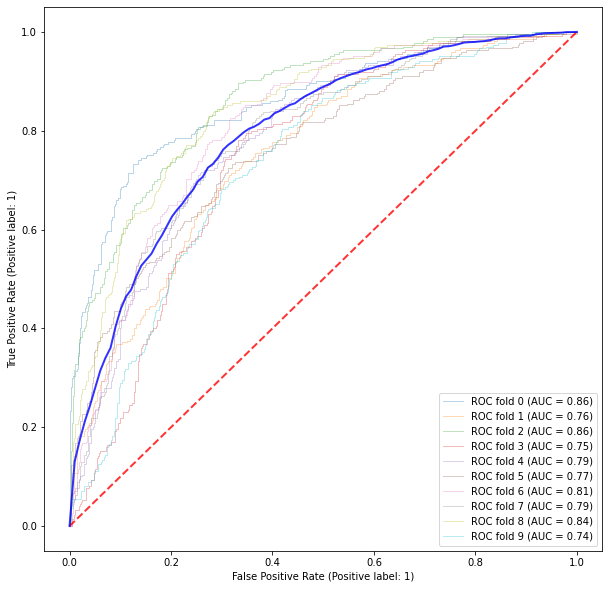

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold


features_selected_set = avalanche_set[['Schneehöhe',
                                       'Niederschlag',
                                       'Lufttemperatur_7h',
                                       'Lufttemperatur_7h_Gew',
                                       'Lufttemperatur_14h_Norm',
                                       'Lufttemperatur_14h_Gew',
                                       'Lufttemperatur_19h',
                                       'Schneetemperatur',
                                       'Windrichtung_Gew',
                                       'Windstärke_Norm',
                                       'Einsinktiefe_Norm',
                                       'Wetter_akt',
                                       'Neuschnee_Norm',
                                       'Neuschnee_last4',
                                       'Neuschnee_last2',
                                       'windstaerke_last1',
                                       'windstaerke_last2',
                                       'Lufttemperatur_last4',
                                       'meanExpo',
                                       'meanSlope',
                                       'stdDevSlope',
                                       'MinSlope',
                                       'MaxSlope',
                                       'Altitude',
                                       'Avalanche']]
X = features_selected_set[features_selected_set.columns.drop('Avalanche')]
y = features_selected_set['Avalanche']
X = StandardScaler().fit_transform(X,y)


cv = StratifiedKFold(n_splits=10)
classifier = LinearDiscriminantAnalysis()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10, 10))
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
plt.figure(figsize=(100, 100))
ax.legend(loc="lower right")
plt.show()

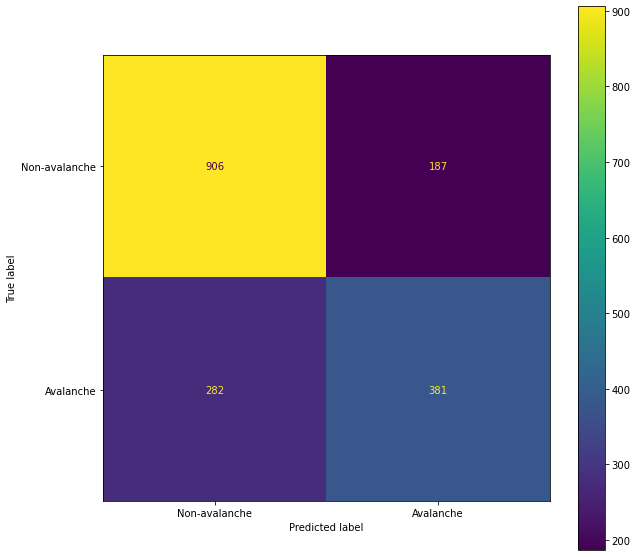

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features_selected_set = avalanche_set[['Schneehöhe',
                                       'Niederschlag',
                                       'Lufttemperatur_7h',
                                       'Lufttemperatur_7h_Gew',
                                       'Lufttemperatur_14h_Norm',
                                       'Lufttemperatur_14h_Gew',
                                       'Lufttemperatur_19h',
                                       'Schneetemperatur',
                                       'Windrichtung_Gew',
                                       'Windstärke_Norm',
                                       'Einsinktiefe_Norm',
                                       'Wetter_akt',
                                       'Neuschnee_Norm',
                                       'Neuschnee_last4',
                                       'Neuschnee_last2',
                                       'windstaerke_last1',
                                       'windstaerke_last2',
                                       'Lufttemperatur_last4',
                                       'meanExpo',
                                       'meanSlope',
                                       'stdDevSlope',
                                       'MinSlope',
                                       'MaxSlope',
                                       'Altitude',
                                       'Avalanche']]
X = features_selected_set[features_selected_set.columns.drop('Avalanche')]
y = features_selected_set['Avalanche']
X = StandardScaler().fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, )
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10, 10))

ConfusionMatrixDisplay.from_estimator(estimator=lda,
                      X=X_test,
                      y=y_test,
                      display_labels=["Non-avalanche", "Avalanche"],
                                      ax=ax)
plt.show()